In [1]:
import numpy as np  
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_mat  = pd.read_csv('E:\project\FINAL\student-mat1.csv')
train_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
train_mat.shape
train_mat.dropna().shape #no null values in train_mat

(395, 33)

In [8]:
subset=train_mat.columns
train_mat=train_mat.drop_duplicates(subset=None, keep='first', inplace=False)
train_mat.shape    #no duplicates in train_mat

(395, 33)

In [6]:
train_mat['subject']='maths'
train=pd.concat([train_mat], axis=0) #combining two data files with subject as discriminant column to distinguish columns
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,maths
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,maths
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,maths
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,maths
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,maths


In [7]:
train.to_csv('E:\project\FINAL\students.csv', index=False)

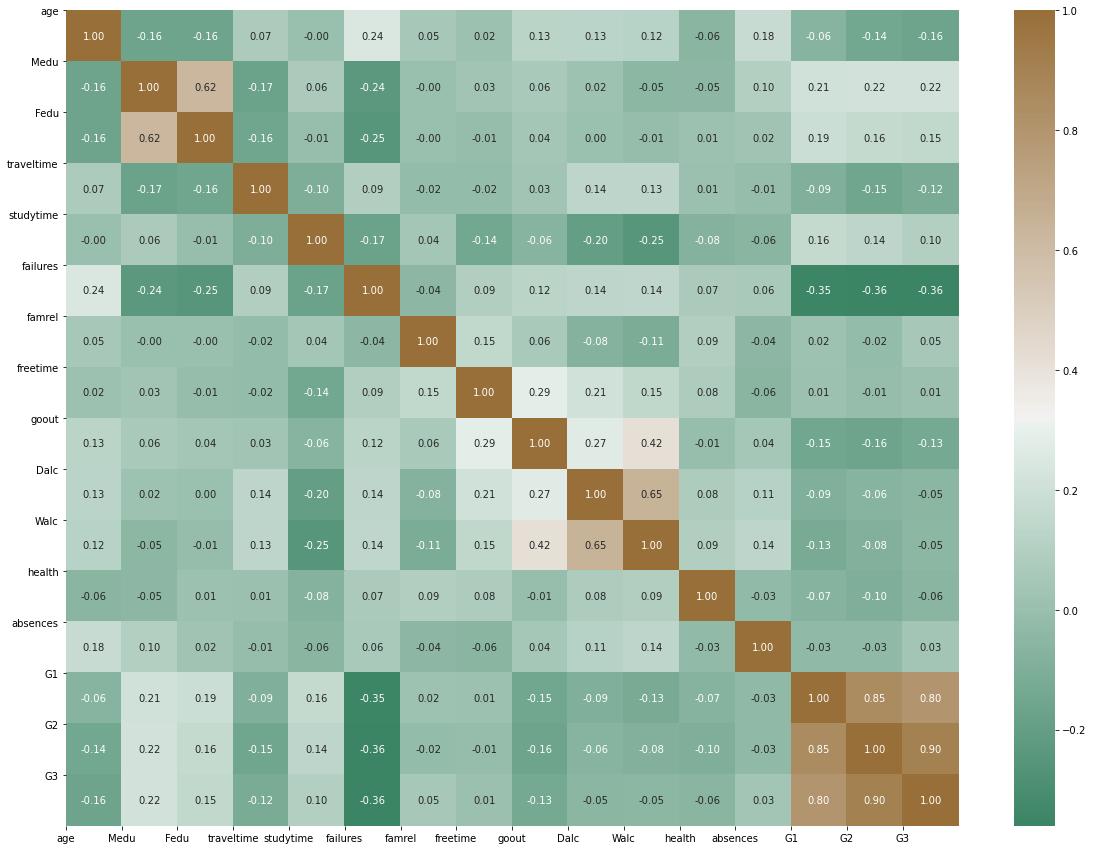

In [10]:
data = pd.read_csv('E:\project\FINAL\students.csv')

def correlation(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 15))
    colormap = sns.diverging_palette(150,50, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.savefig('Correlation.png', bbox_inches='tight')
    plt.show()

correlation(data)

In [8]:
# convert finalscore to categorical variable
data = pd.read_csv('E:\project\FINAL\students.csv')
data.head()
data['FinalGrade'] = 'na'
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'Excellent'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'Good' 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'Satisfactory' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'Poor' 
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'Failure' 
data.head(5)

# data.drop(['Grade'],axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,maths,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,maths,Poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,maths,Poor
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,maths,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,maths,Poor


In [9]:
#absences - number of school absences (numeric: from 0 to 93) 
data.head()
data['Regularity'] = 'na'
data.loc[(data.absences >= 0) & (data.absences <= 9), 'Regularity'] = 'Always Regular'
data.loc[(data.absences >= 10) & (data.absences <= 29), 'Regularity'] = 'Mostly Regular' 
data.loc[(data.absences >= 30) & (data.absences <= 49), 'Regularity'] = 'Regular' 
data.loc[(data.absences >= 50) & (data.absences <= 79), 'Regularity'] = 'Irregular' 
data.loc[(data.absences >= 80)& (data.absences <= 93), 'Regularity'] = 'Highly Irregular'
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Regularity
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,maths,Poor,Always Regular
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,maths,Poor,Always Regular
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,maths,Poor,Mostly Regular
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,maths,Good,Always Regular
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,maths,Poor,Always Regular


In [10]:
data['Grade1'] = 'na'
data.loc[(data.G1 >= 18) & (data.G1 <= 20), 'Grade1'] = 'Excellent'
data.loc[(data.G1 >= 15) & (data.G1 <= 17), 'Grade1'] = 'Good' 
data.loc[(data.G1 >= 11) & (data.G1 <= 14), 'Grade1'] = 'Satisfactory' 
data.loc[(data.G1 >= 6) & (data.G1 <= 10), 'Grade1'] = 'Poor' 
data.loc[(data.G1 >= 0) & (data.G1 <= 5), 'Grade1'] = 'Failure' 

data['Grade2'] = 'na'
data.loc[(data.G2 >= 18) & (data.G2 <= 20), 'Grade2'] = 'Excellent'
data.loc[(data.G2 >= 15) & (data.G2 <= 17), 'Grade2'] = 'Good' 
data.loc[(data.G2 >= 11) & (data.G2 <= 14), 'Grade2'] = 'Satisfactory' 
data.loc[(data.G2 >= 6) & (data.G2 <= 10), 'Grade2'] = 'Poor' 
data.loc[(data.G2 >= 0) & (data.G2 <= 5), 'Grade2'] = 'Failure' 

data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,6,5,6,6,maths,Poor,Always Regular,Failure,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,4,5,5,6,maths,Poor,Always Regular,Failure,Failure
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,10,7,8,10,maths,Poor,Mostly Regular,Poor,Poor
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,2,15,14,15,maths,Good,Always Regular,Good,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,4,6,10,10,maths,Poor,Always Regular,Poor,Poor


In [12]:
data.shape


(395, 38)

In [20]:
data.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,6,5,6,6,maths,Poor,Always Regular,Failure,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,4,5,5,6,maths,Poor,Always Regular,Failure,Failure
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,10,7,8,10,maths,Poor,Mostly Regular,Poor,Poor
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,2,15,14,15,maths,Good,Always Regular,Good,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,4,6,10,10,maths,Poor,Always Regular,Poor,Poor
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,10,15,15,15,maths,Good,Mostly Regular,Good,Good
6,GP,M,16,U,LE3,T,2,2,other,other,...,3,0,12,12,11,maths,Satisfactory,Always Regular,Satisfactory,Satisfactory
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,6,6,5,6,maths,Poor,Always Regular,Poor,Failure
8,GP,M,15,U,LE3,A,3,2,services,other,...,1,0,16,18,19,maths,Excellent,Always Regular,Good,Excellent
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,0,14,15,15,maths,Good,Always Regular,Satisfactory,Good


In [22]:
data.to_csv(r'E:\project\FINAL\features.csv', index=False)